The main purpose of this analysis is to see if there is any corolation between fluoride and overall better dental health outcomes. What really drives me that I really stuggled with my dental health growing up, even though I would make a priority out of brushing, flossing, going to check ups every 6 months. What I came to relize is that I did not have fluorinated water growing up, I had well water(which as little to no fluoride). My hope is that I find some sort of corrolation between having fluorinated water and positive dental health outcomes.

In [54]:
import pandas as pd
import json
import requests
import base64
import matplotlib.pyplot as plt
import six
import statsmodels.formula.api as smf
import numpy as np

In [55]:

PaData = pd.read_csv(r"C:\Users\conne\Downloads\ExportCSV.csv")

PaData = PaData.drop(columns=[
    'LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
    'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
    'High_Confidence_Limit', 'Stratification', 'StratificationType', 
    'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
    'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'
])


PaData_filtered = PaData[PaData['Response'] == 'Yes'].drop(columns=['Response'])


PaData_filtered = PaData_filtered.rename(columns={
    'LocationDesc': 'State',
    'Data_Value': 'Tooth Loss %'
})


PaData_filtered.head()


,Year,State,Indicator,Tooth Loss %
0,2020.0,Pennsylvania,Adults aged 65+ who have lost six or more teet...,36.1


In [56]:


Pafloride = pd.read_csv(r'C:\Users\conne\Downloads\pafloride.csv')

Pafloride = Pafloride.drop(columns=[
    'LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
    'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
    'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
    'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'
])
Pafloride_filtered = Pafloride[Pafloride['Type'] == 'Fluoridated'].drop(columns=['Type'])
Pafloride_filtered = Pafloride_filtered.rename(columns={
    'LocationDesc': 'State',
    'Data_Value': 'Fluoridation %'
})

Pafloride_filtered.head()


,Year,State,Indicator,Fluoridation %
0,2020.0,Pennsylvania,Percentage of PWS population receiving fluorid...,60.0


In [57]:
TexasData = pd.read_csv(r'C:\Users\conne\Downloads\Texasdata.csv')
TexasData = TexasData.drop(columns=['LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
                                    'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
                                    'High_Confidence_Limit', 'Stratification', 'StratificationType', 
                                    'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
                                    'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'])
TexasData_filtered = TexasData[TexasData['Response'] == 'Yes']
TexasData_filtered = TexasData_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Tooth Loss %'})


TexasFluoride = pd.read_csv(r"C:\Users\conne\Downloads\TexasFluoride.csv")
TexasFluoride = TexasFluoride.drop(columns=['LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
                                           'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
                                           'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
                                           'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'])
TexasFluoride_filtered = TexasFluoride[TexasFluoride['Type'] == 'Fluoridated'].drop(columns=['Type'])
TexasFluoride_filtered = TexasFluoride_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Fluoridation %'})

TexasFluoride_filtered.head()
TexasData_filtered.head()

,Year,State,Indicator,Response,Tooth Loss %
0,2020.0,Texas,Adults aged 65+ who have lost six or more teet...,Yes,31.5


In [58]:
PAmerged_data = pd.merge(
    PaData_filtered[['Year', 'State', 'Tooth Loss %']], 
    Pafloride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner'  
)
PAmerged_data['Dental_Health_Rank'] = PAmerged_data['State'].apply(lambda x: 27 if x == 'Pennsylvania' else '')


PAmerged_data.head()

,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,Pennsylvania,36.1,60.0,27


In [59]:
Texasmerged_data = pd.merge(
    TexasData_filtered[['Year', 'State', 'Tooth Loss %']], 
    TexasFluoride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner' 
)
Texasmerged_data['Dental_Health_Rank'] = Texasmerged_data['State'].apply(lambda x: 46 if x == 'Texas' else '')


Texasmerged_data.head()

,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,Texas,31.5,71.0,46


In [60]:
IllinoisData = pd.read_csv(r'C:\Users\conne\Downloads\Illinoisdata.csv')
IllinoisData = IllinoisData.drop(columns=['LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
                                          'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
                                          'High_Confidence_Limit', 'Stratification', 'StratificationType', 
                                          'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
                                          'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'])
IllinoisData_filtered = IllinoisData[IllinoisData['Response'] == 'Yes']
IllinoisData_filtered = IllinoisData_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Tooth Loss %'})


IllinoisFluoride = pd.read_csv(r"C:\Users\conne\Downloads\IllinoisFluoride.csv")
IllinoisFluoride = IllinoisFluoride.drop(columns=['LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
                                                 'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
                                                 'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
                                                 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'])
IllinoisFluoride_filtered = IllinoisFluoride[IllinoisFluoride['Type'] == 'Fluoridated'].drop(columns=['Type'])
IllinoisFluoride_filtered = IllinoisFluoride_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Fluoridation %'})

IllinoisFluoride_filtered.head()
IllinoisData_filtered.head()

Illinoismerged_data = pd.merge(
    IllinoisData_filtered[['Year', 'State', 'Tooth Loss %']], 
    IllinoisFluoride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner' 
)
Illinoismerged_data['Dental_Health_Rank'] = Illinoismerged_data['State'].apply(lambda x: 1 if x == 'Illinois' else '')


Illinoismerged_data.head()


,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,Illinois,30.7,98.4,1


In [61]:
MississippiData = pd.read_csv(r'C:\Users\conne\Downloads\Missdata.csv')
MississippiData = MississippiData.drop(columns=['LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
                                  'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
                                  'High_Confidence_Limit', 'Stratification', 'StratificationType', 
                                  'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
                                  'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'])
MississippiData_filtered = MississippiData[MississippiData['Response'] == 'Yes']
MississippiData_filtered = MississippiData_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Tooth Loss %'})


MississippiFluoride = pd.read_csv(r"C:\Users\conne\Downloads\MissFluoride.csv")
MississippiFluoride = MississippiFluoride.drop(columns=['LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
                                           'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
                                           'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
                                           'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'])
MississippiFluoride_filtered = MississippiFluoride[MississippiFluoride['Type'] == 'Fluoridated'].drop(columns=['Type'])
MississippiFluoride_filtered = MississippiFluoride_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Fluoridation %'})

Mississippimerged_data = pd.merge(
    MississippiData_filtered[['Year', 'State', 'Tooth Loss %']], 
    MississippiFluoride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner' 
)
Mississippimerged_data['Dental_Health_Rank'] = Mississippimerged_data['State'].apply(lambda x: 49 if x == 'Mississippi' else '')


Mississippimerged_data.head()


,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,Mississippi,44.6,61.1,49


In [62]:
NewJerseyData = pd.read_csv(r'C:\Users\conne\Downloads\NewJerseydata.csv')
NewJerseyData = NewJerseyData.drop(columns=['LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
                                          'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
                                          'High_Confidence_Limit', 'Stratification', 'StratificationType', 
                                          'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
                                          'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'])
NewJerseyData_filtered = NewJerseyData[NewJerseyData['Response'] == 'Yes']
NewJerseyData_filtered = NewJerseyData_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Tooth Loss %'})


NewJerseyFluoride = pd.read_csv(r"C:\Users\conne\Downloads\NewJerseyFluoride.csv")
NewJerseyFluoride = NewJerseyFluoride.drop(columns=['LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
                                                 'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
                                                 'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
                                                 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'])
NewJerseyFluoride_filtered = NewJerseyFluoride[NewJerseyFluoride['Type'] == 'Fluoridated'].drop(columns=['Type'])
NewJerseyFluoride_filtered = NewJerseyFluoride_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Fluoridation %'})

NewJerseyFluoride_filtered.head()
NewJerseyData_filtered.head()

NewJerseymerged_data = pd.merge(
    NewJerseyData_filtered[['Year', 'State', 'Tooth Loss %']], 
    NewJerseyFluoride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner' 
)
NewJerseymerged_data['Dental_Health_Rank'] = NewJerseymerged_data['State'].apply(lambda x: 3 if x == 'New Jersey' else '')

NewJerseymerged_data.head()


,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,New Jersey,29.7,16.1,3


In [70]:
ColoradoData = pd.read_csv(r'C:\Users\conne\Downloads\Coloradodata.csv')
ColoradoData = ColoradoData.drop(columns=['LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
                                          'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
                                          'High_Confidence_Limit', 'Stratification', 'StratificationType', 
                                          'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
                                          'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'])
ColoradoData_filtered = ColoradoData[ColoradoData['Response'] == 'Yes']
ColoradoData_filtered = ColoradoData_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Tooth Loss %'})


ColoradoFluoride = pd.read_csv(r"C:\Users\conne\Downloads\ColoradoFluoride.csv")
ColoradoFluoride = ColoradoFluoride.drop(columns=['LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
                                                 'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
                                                 'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
                                                 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'])
ColoradoFluoride_filtered = ColoradoFluoride[ColoradoFluoride['Type'] == 'Fluoridated'].drop(columns=['Type'])
ColoradoFluoride_filtered = ColoradoFluoride_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Fluoridation %'})

ColoradoFluoride_filtered.head()
ColoradoData_filtered.head()

Coloradomerged_data = pd.merge(
    ColoradoData_filtered[['Year', 'State', 'Tooth Loss %']], 
    ColoradoFluoride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner' 
)
Coloradomerged_data['Dental_Health_Rank'] = Coloradomerged_data['State'].apply(lambda x: 38 if x == 'Colorado' else '')


Coloradomerged_data.head()


,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,Colorado,24.1,75.2,38


In [71]:
combined_data = pd.concat([Illinoismerged_data,PAmerged_data,Mississippimerged_data,Texasmerged_data,NewJerseymerged_data,Coloradomerged_data], ignore_index=True)

combined_data.head(6)

,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,Illinois,30.7,98.4,1
1,2020.0,Pennsylvania,36.1,60.0,27
2,2020.0,Mississippi,44.6,61.1,49
3,2020.0,Texas,31.5,71.0,46
4,2020.0,New Jersey,29.7,16.1,3
5,2020.0,Colorado,24.1,75.2,38


What I find really interesting and suprising is that New jersey has a low Fluoridation percentage and they are ranked 3rd in overall dental health in the US. 

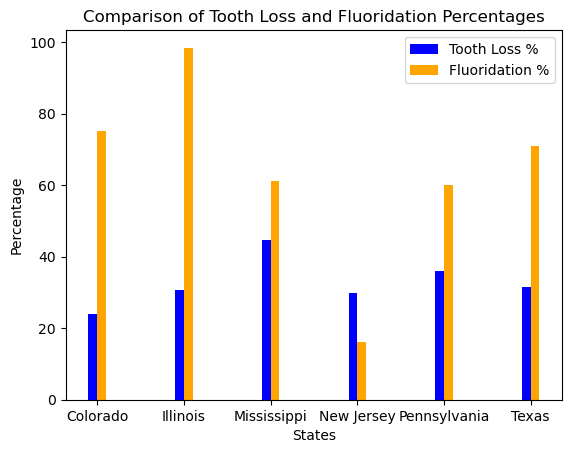

In [65]:


tooth_loss = combined_data.groupby('State')['Tooth Loss %'].mean()
fluoridation = combined_data.groupby('State')['Fluoridation %'].mean()

tooth_loss = tooth_loss.sort_index()
fluoridation = fluoridation.sort_index()

bar_width = 0.1
index = np.arange(len(tooth_loss)) 

# Plotting the bars
plt.bar(index, tooth_loss, bar_width, label='Tooth Loss %', color='blue')
plt.bar(index + bar_width, fluoridation, bar_width, label='Fluoridation %', color='orange')

plt.xlabel('States')
plt.ylabel('Percentage')
plt.title('Comparison of Tooth Loss and Fluoridation Percentages')

plt.xticks(index + bar_width / 2, tooth_loss.index)  # This just alligns the bars with the states name

plt.legend()

plt.show()
